In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

SIZE = 18

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title

f = lambda x, t: np.exp(-x**2)*np.sin(x+3*t)*np.cos(x-t)

xx = np.linspace(-5,5,101)
tt = np.linspace(0,10,51)

x_grid, t_grid = np.meshgrid(xx, tt)
f_xt = f(x_grid, t_grid)

# A: 
Plot the singular values in uniform as well as semilog scales

In [0]:
u, s, vh = np.linalg.svd(f_xt)

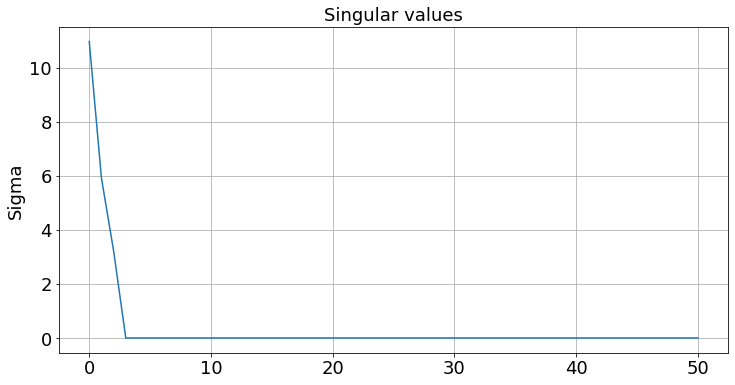

In [0]:
plt.figure(figsize=(12,6))
plt.plot(s)
plt.grid(True)
plt.ylabel('Sigma')
plt.title('Singular values');

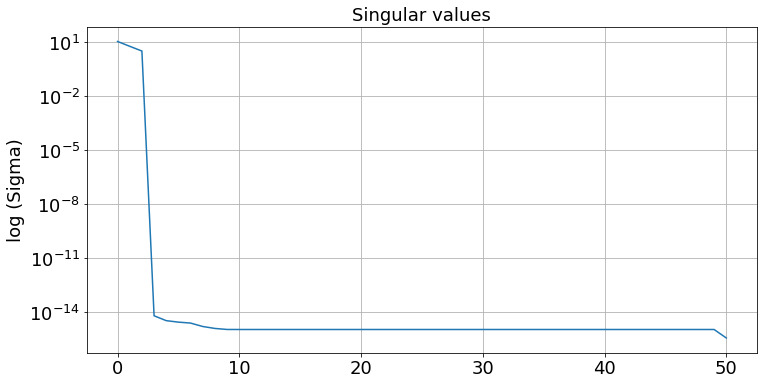

In [0]:
plt.figure(figsize=(12,6))
plt.plot(s)
plt.yscale("log")
plt.grid(True)
plt.ylabel('log (Sigma)')
plt.title('Singular values');

# B
Plot the solution in the x-t plane over the given interval

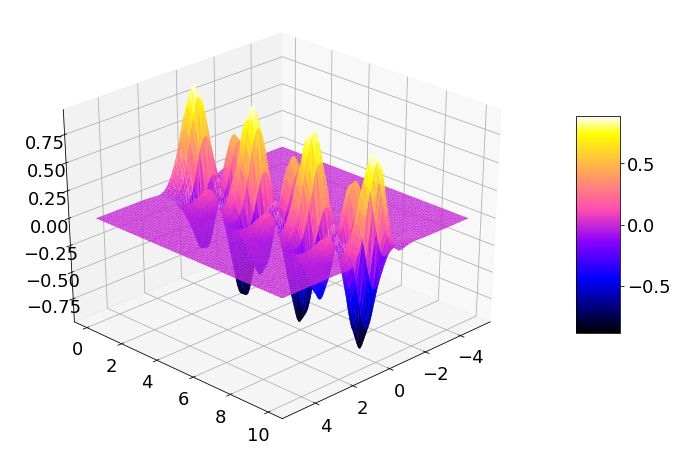

In [0]:
# Make the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
# Add a color bar which maps values to colors
surf = ax.plot_trisurf(x_grid.reshape(-1), t_grid.reshape(-1), f_xt.reshape(-1), cmap=plt.cm.gnuplot2, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
# Rotate it
ax.view_init(30, 45)

# C
How much “energy” of the solution is contained in mode 1 and in modes 1+2?

In [0]:
print ("Energy contained in the 1 mode:   ", s[0]/s.sum())
print ("Energy contained in the 1+2 modes:", (s[0] + s[1])/s.sum())

Energy contained in the 1 mode:    0.5455682814379995
Energy contained in the 1+2 modes: 0.8397531558059592


# D
Plot the ﬁrst two columns of U and V in the SVD of matrix F obtained by calculating f (x,t) over a grid with 100 points in x and 50 points in t. Explain their meaning

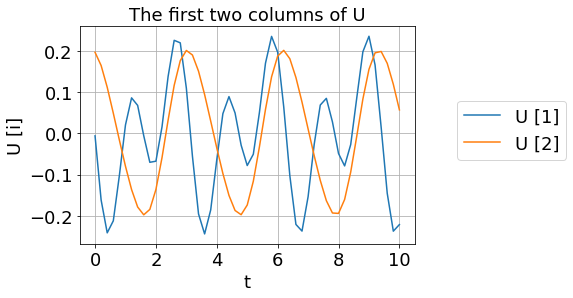

The columns of U are identified as spatial modes.


In [0]:
plt.plot(tt, u[:, 0], label="U [1]")
plt.plot(tt, u[:, 1], label="U [2]")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 0.7))
plt.title("The ﬁrst two columns of U")
plt.xlabel("t")
plt.ylabel("U [i]")
plt.show()

print ("The columns of U are identified as spatial modes.") 

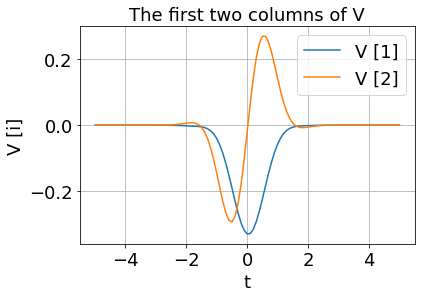

The components of V contain the time evolution of the modes.


In [0]:
plt.plot(xx, vh[0, :], label="V [1]")
plt.plot(xx, vh[1, :], label="V [2]")
plt.grid(True)
plt.legend()
plt.title("The ﬁrst two columns of V")
plt.xlabel("t")
plt.ylabel("V [i]")
plt.show()

print ("The components of V contain the time evolution of the modes.")

#### Rank-2 approximation of F:

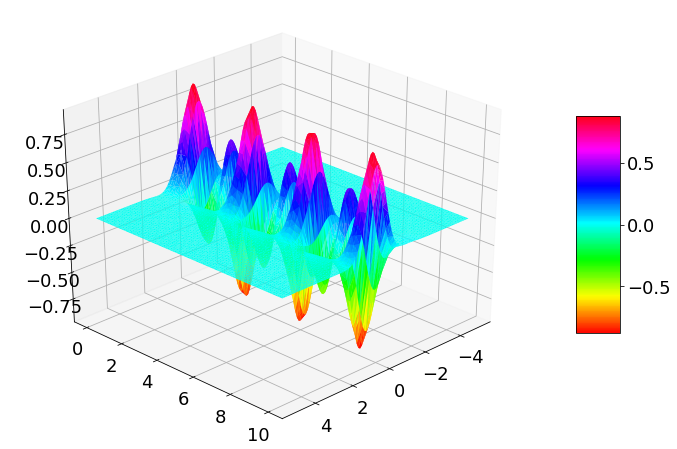

In [0]:
f_2_xt = ((u[:, :2]*s[:2])@vh[:2, :])

fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_grid.reshape(-1), t_grid.reshape(-1), f_2_xt.reshape(-1), cmap=plt.cm.hsv, linewidth=0.01)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 45)

#### Error of rank-2 approximation:

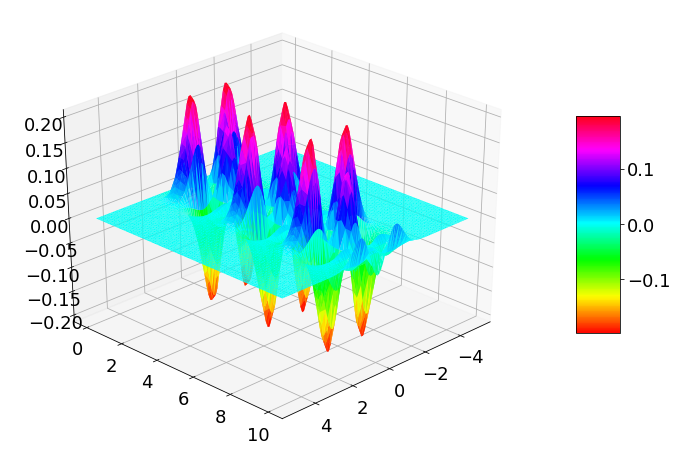

In [0]:
error = f_2_xt - f_xt

fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_grid.reshape(-1), t_grid.reshape(-1), error.reshape(-1), cmap=plt.cm.hsv, linewidth=0.01)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 45)